In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve
from sklearn.datasets import load_breast_cancer
from sklearn.compose import make_column_transformer
from sklearn import set_config

set_config(display="diagram")


In [3]:
df = pd.read_csv('Mirai_Botnet.csv', index_col=0)
df.head()

,src,sport,dst,dport,label
time,,,,,
1.540446e+09,192.168.2.108,21074,52.24.43.67,80,0
1.540446e+09,192.168.2.108,20532,52.25.66.250,8280,0
1.540446e+09,192.168.2.1,-1,192.168.2.108,-1,0
1.540446e+09,192.168.2.1,-1,192.168.2.108,-1,0
1.540446e+09,192.168.2.101,-1,192.168.2.110,-1,0


In [4]:

df.head()
df.dropna()

,src,sport,dst,dport,label
time,,,,,
1.540446e+09,192.168.2.108,21074,52.24.43.67,80,0
1.540446e+09,192.168.2.108,20532,52.25.66.250,8280,0
1.540446e+09,192.168.2.1,-1,192.168.2.108,-1,0
1.540446e+09,192.168.2.1,-1,192.168.2.108,-1,0
1.540446e+09,192.168.2.101,-1,192.168.2.110,-1,0
...,...,...,...,...,...
1.540454e+09,192.168.2.1,-1,192.168.2.109,-1,1
1.540454e+09,192.168.2.108,47157,52.24.43.67,80,1
1.540454e+09,192.168.2.108,46453,52.25.66.250,8280,1


In [5]:
df.src.value_counts()


src
192.168.2.108    51747
192.168.2.1      35416
192.168.2.113    34805
192.168.2.110    23554
192.168.2.115    13486
192.168.2.112     9395
192.168.2.101     8688
192.168.2.109     5771
192.168.2.104     4390
192.168.2.107     1896
192.168.2.118     1722
192.168.2.103     1624
192.168.2.126     1415
192.168.2.111      744
192.168.2.121      739
192.168.2.122      733
192.168.2.119      445
192.168.2.120      404
192.168.2.105      391
192.168.2.196      270
192.168.2.117       39
0.0.0.0             27
Name: count, dtype: int64

In [6]:
df.dst.value_counts()


dst
192.168.2.1      28281
192.168.2.110    19804
61.188.37.216    13700
46.137.188.54    13375
50.19.254.134    13268
                 ...  
192.168.2.117        1
192.168.2.121        1
192.168.2.105        1
192.168.2.122        1
192.168.4.1          1
Name: count, Length: 76, dtype: int64

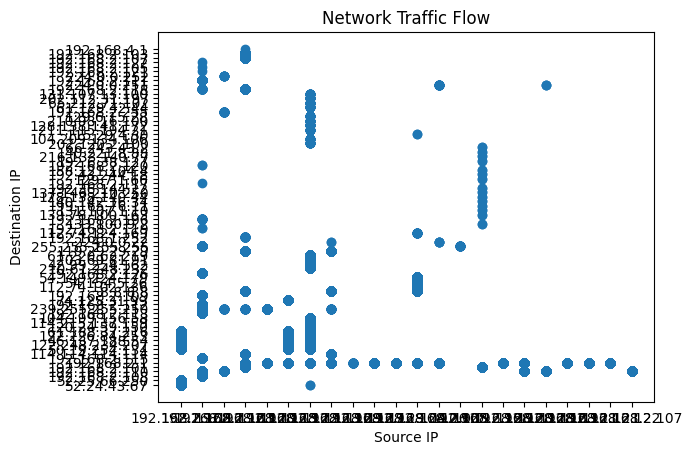

In [7]:
fig, ax = plt.subplots()

ax.scatter(df["src"], df["dst"])

ax.set_xlabel("Source IP")

ax.set_ylabel("Destination IP")

plt.title("Network Traffic Flow")

plt.show()


In [8]:
df.loc[:, 'dst_ip_oct1'] = df['dst'].astype(str).apply(lambda x: x.split(".")[0])
df.loc[:, 'dst_ip_oct2'] = df['dst'].astype(str).apply(lambda x: x.split(".")[1])
df.loc[:, 'dst_ip_oct3'] = df['dst'].astype(str).apply(lambda x: x.split(".")[2])
df.loc[:, 'dst_ip_oct4'] = df['dst'].astype(str).apply(lambda x: x.split(".")[3])

df.head()

,src,sport,dst,dport,label,dst_ip_oct1,dst_ip_oct2,dst_ip_oct3,dst_ip_oct4
time,,,,,,,,,
1.540446e+09,192.168.2.108,21074,52.24.43.67,80,0,52,24,43,67
1.540446e+09,192.168.2.108,20532,52.25.66.250,8280,0,52,25,66,250
1.540446e+09,192.168.2.1,-1,192.168.2.108,-1,0,192,168,2,108
1.540446e+09,192.168.2.1,-1,192.168.2.108,-1,0,192,168,2,108
1.540446e+09,192.168.2.101,-1,192.168.2.110,-1,0,192,168,2,110


In [9]:
X_matrix_dst = np.array(df[['dst_ip_oct1', 'dst_ip_oct2', 'dst_ip_oct3', 'dst_ip_oct4']])
print(X_matrix_dst.shape)
print(X_matrix_dst[0:5])


(197701, 4)
[['52' '24' '43' '67']
 ['52' '25' '66' '250']
 ['192' '168' '2' '108']
 ['192' '168' '2' '108']
 ['192' '168' '2' '110']]


In [10]:
from sklearn.decomposition import PCA



#destination
pcad = PCA(n_components=4)
pcad.fit(X_matrix_dst)
print(pcad.explained_variance_ratio_)

[0.50455903 0.28450592 0.15518082 0.05575423]


In [11]:
pca_dest = PCA(n_components=3)
pcad = pca_dest.fit_transform(X_matrix_dst)
pcad1=[]
pcad2=[]
pcad3=[]

#destination
for i in pcad:
    pcad1.append(i[0])
    pcad2.append(i[1])
    pcad3.append(i[1])

print(len(pcad1))
print(len(pcad2))
print(len(pcad3))


197701
197701
197701


In [12]:
df['dst_ip_pca1'] = pcad1
df['dst_ip_pca2'] = pcad2
df['dst_ip_pca3'] = pcad3

In [13]:
df.head()

,src,sport,dst,dport,label,dst_ip_oct1,dst_ip_oct2,dst_ip_oct3,dst_ip_oct4,dst_ip_pca1,dst_ip_pca2,dst_ip_pca3
time,,,,,,,,,,,,
1.540446e+09,192.168.2.108,21074,52.24.43.67,80,0,52,24,43,67,16.400949,-141.445515,-141.445515
1.540446e+09,192.168.2.108,20532,52.25.66.250,8280,0,52,25,66,250,107.373923,-20.591873,-20.591873
1.540446e+09,192.168.2.1,-1,192.168.2.108,-1,0,192,168,2,108,-86.877878,25.226555,25.226555
1.540446e+09,192.168.2.1,-1,192.168.2.108,-1,0,192,168,2,108,-86.877878,25.226555,25.226555
1.540446e+09,192.168.2.101,-1,192.168.2.110,-1,0,192,168,2,110,-86.076512,26.549284,26.549284


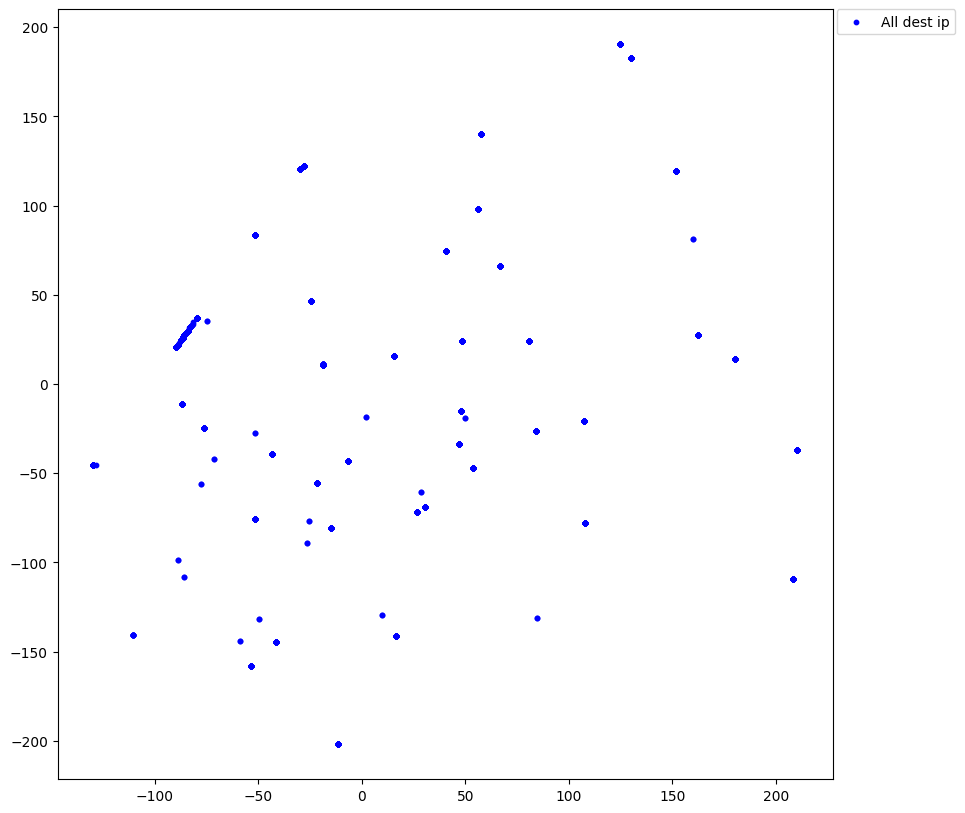

In [14]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(df['dst_ip_pca1'], df['dst_ip_pca2'], s=10, color='blue',label="All dest ip")
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.show()

In [15]:
from sklearn.mixture import BayesianGaussianMixture

# Check 10 clusters
bgms = BayesianGaussianMixture(n_components=10, n_init=10, random_state=100)

bgms.fit(X_matrix_dst)
np.round(bgms.weights_, 2)

array([0.05, 0.32, 0.09, 0.08, 0.07, 0.14, 0.07, 0.06, 0.03, 0.07])

In [16]:
print(bgms.means_)
pca_means = pca_dest.transform(bgms.means_)
print()
print(pca_means)

[[ 77.2394417   24.64137805  63.40311917 212.88186935]
 [191.99908725 167.99970711   2.00106926 109.32458902]
 [ 59.12953838 151.0303225  180.75211586  54.90879026]
 [120.07512175 223.34746742  96.75625223 230.36565531]
 [132.6726178  248.61971236 235.86892893 210.90491794]
 [191.99793018 167.99933582   2.00249546   1.00410727]
 [ 57.58562234  25.03986914 253.68853054 140.26104903]
 [ 49.79952827  19.87997491  29.68163061  42.07465037]
 [113.91485287 112.68102191  87.36325278 109.88450073]
 [ 61.00491083 190.28324059  38.78811109 216.2076019 ]]

[[  78.87457836  -38.60468562  136.87204002]
 [ -86.34584063   26.10210333    9.08157918]
 [  94.44891367  -63.79881125  -79.93694765]
 [  59.86939546  122.26357823   20.08606453]
 [ 149.88854071  125.13544937  -87.8025909 ]
 [-129.74633501  -45.53785596  -54.97794981]
 [ 206.14248984  -98.8159115   -10.79986543]
 [  -2.21700419 -160.89240419   65.64688272]
 [  25.00604572  -36.2324258     9.17843814]
 [  41.96107269   76.29008794   78.31472908

In [17]:
bgms.predict(X_matrix_dst)
df['kcluster']=bgms.predict(X_matrix_dst).tolist()
df.kcluster.value_counts()

kcluster
1    64136
5    28282
2    17287
3    15886
9    14754
6    14727
4    13575
7    12178
0     9995
8     6881
Name: count, dtype: int64

In [18]:
dfd0=df[df.kcluster==0]
dfd1=df[df.kcluster==1]
dfd2=df[df.kcluster==2]
dfd3=df[df.kcluster==3]
dfd4=df[df.kcluster==4]
dfd5=df[df.kcluster==5]
dfd6=df[df.kcluster==6]
dfd7=df[df.kcluster==7]
dfd8=df[df.kcluster==8]
dfd0.dst.value_counts()


dst
52.25.66.250     6286
120.24.59.150    3709
Name: count, dtype: int64

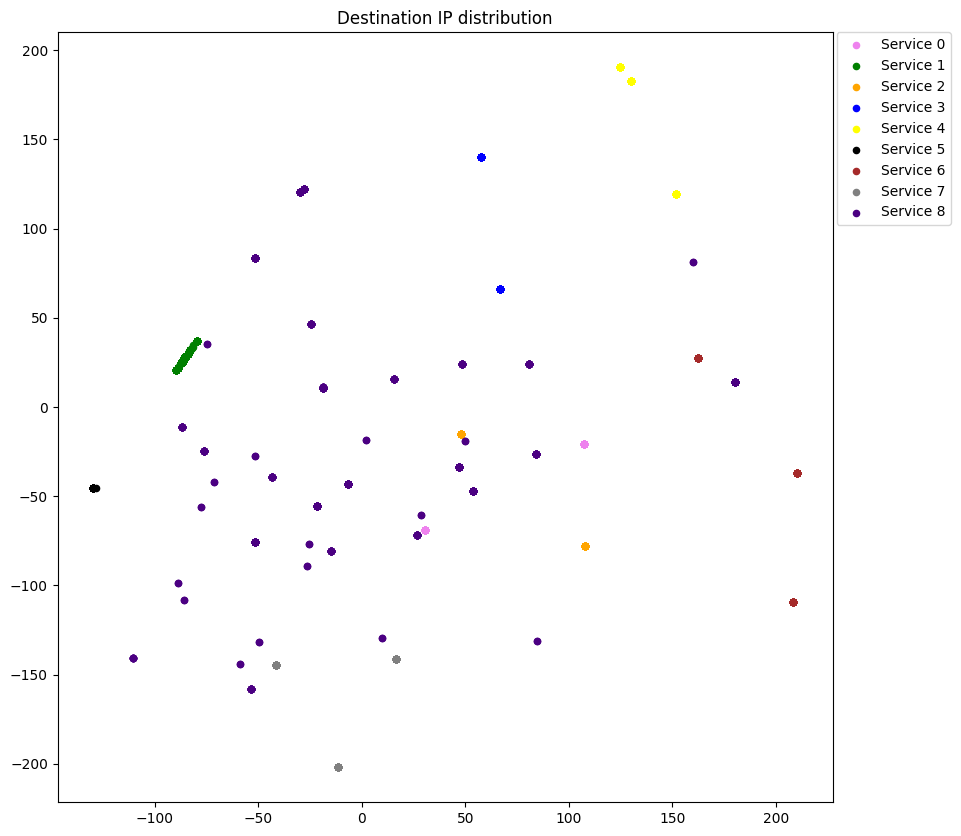

In [19]:
import matplotlib.pyplot as pyplot
fig = pyplot.figure()

pyplot.scatter(dfd0['dst_ip_pca1'],dfd0['dst_ip_pca2'],s=20,label="Service 0", color='violet')
pyplot.scatter(dfd1['dst_ip_pca1'],dfd1['dst_ip_pca2'],s=20,label="Service 1", color='green')
pyplot.scatter(dfd2['dst_ip_pca1'],dfd2['dst_ip_pca2'],s=20,label="Service 2", color='orange')
pyplot.scatter(dfd3['dst_ip_pca1'],dfd3['dst_ip_pca2'],s=20,label="Service 3",  color='blue')
pyplot.scatter(dfd4['dst_ip_pca1'],dfd4['dst_ip_pca2'],s=20,label="Service 4", color='yellow')
pyplot.scatter(dfd5['dst_ip_pca1'],dfd5['dst_ip_pca2'],s=20,label="Service 5", color='black')
pyplot.scatter(dfd6['dst_ip_pca1'],dfd6['dst_ip_pca2'],s=20,label="Service 6", color='brown')
pyplot.scatter(dfd7['dst_ip_pca1'],dfd7['dst_ip_pca2'],s=20,label="Service 7", color='grey')
pyplot.scatter(dfd8['dst_ip_pca1'],dfd8['dst_ip_pca2'],s=20,label="Service 8", color='indigo')
pyplot.title("Destination IP distribution")
pyplot.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
pyplot.show()
fig.savefig("dst_ip_classification.png")

In [31]:
import ipaddress

def ip_to_int(ip):
    return int(ipaddress.IPv4Address(ip))
    
df['dst_int'] = df['dst'].apply(ip_to_int)
df['src_int'] = df['src'].apply(ip_to_int)
X = df[['src_int','dst_int']]
y = df['kcluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(len(X_train))
print(len(X_test))


138390
59311


In [35]:
# Create a KNN classifier with k=3

param_grid = {
    'n_neighbors': [1,2,3],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')


# Fit the model on the training data
grid_search.fit(X_train, y_train)


# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best cross-validation score
print("Best cross-validation score:", grid_search.best_score_)

# Make predictions on the test data using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 0.9999927740443674
Accuracy: 0.999983139721131
